In [14]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation
import pickle
import os
from tqdm import tqdm

In [15]:
model = MLPRegressor(hidden_layer_sizes = (500,500,500), max_iter = 500)

In [16]:
DATADIR = '../Data/fBmFields/2DUnexponentiated/100px/'

path = os.path.join(DATADIR,'Training/features')

X_train = []
for img in tqdm(os.listdir(path)):
    img_array = np.loadtxt(os.path.join(path,img))/255.0
    img_array = img_array.flatten()
    X_train.append(img_array)

print(X_train)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [05:55<00:00, 56.22it/s]


[array([ 0.45098039,  0.45490196,  0.4745098 , ...,  0.30196078,
        0.35294118,  0.4       ]), array([ 0.63529412,  0.65098039,  0.58431373, ...,  0.69411765,
        0.70196078,  0.64705882]), array([ 0.45098039,  0.41960784,  0.43137255, ...,  0.48235294,
        0.44313725,  0.56470588]), array([ 0.53333333,  0.56078431,  0.49803922, ...,  0.61176471,
        0.51372549,  0.36470588]), array([ 0.61568627,  0.63137255,  0.65882353, ...,  0.61960784,
        0.61568627,  0.58431373]), array([ 0.60784314,  0.58823529,  0.61176471, ...,  0.64705882,
        0.59215686,  0.56078431]), array([ 0.46666667,  0.56078431,  0.50196078, ...,  0.48627451,
        0.51764706,  0.52941176]), array([ 0.50980392,  0.50588235,  0.50588235, ...,  0.44313725,
        0.46666667,  0.49411765]), array([ 0.60784314,  0.54117647,  0.5254902 , ...,  0.66666667,
        0.75686275,  0.63529412]), array([ 0.75294118,  0.70980392,  0.6627451 , ...,  0.54901961,
        0.63137255,  0.64313725]), array([ 0

        0.76862745,  0.77254902])]


In [17]:
path = os.path.join(DATADIR,'Testing/features')

X_test = []
for img in tqdm(os.listdir(path)):
    img_array = np.loadtxt(os.path.join(path,img))/255.0
    img_array = img_array.flatten()
    X_test.append(img_array)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.28it/s]


In [18]:
y_train = np.loadtxt(os.path.join(DATADIR,'Training/labels/labels.txt'))
y_test = np.loadtxt(os.path.join(DATADIR,'Testing/labels/labels.txt'))

In [19]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
from NeuralNet import Pearson, RMSE

In [21]:
predictions = model.predict(X_test)

In [22]:
import time

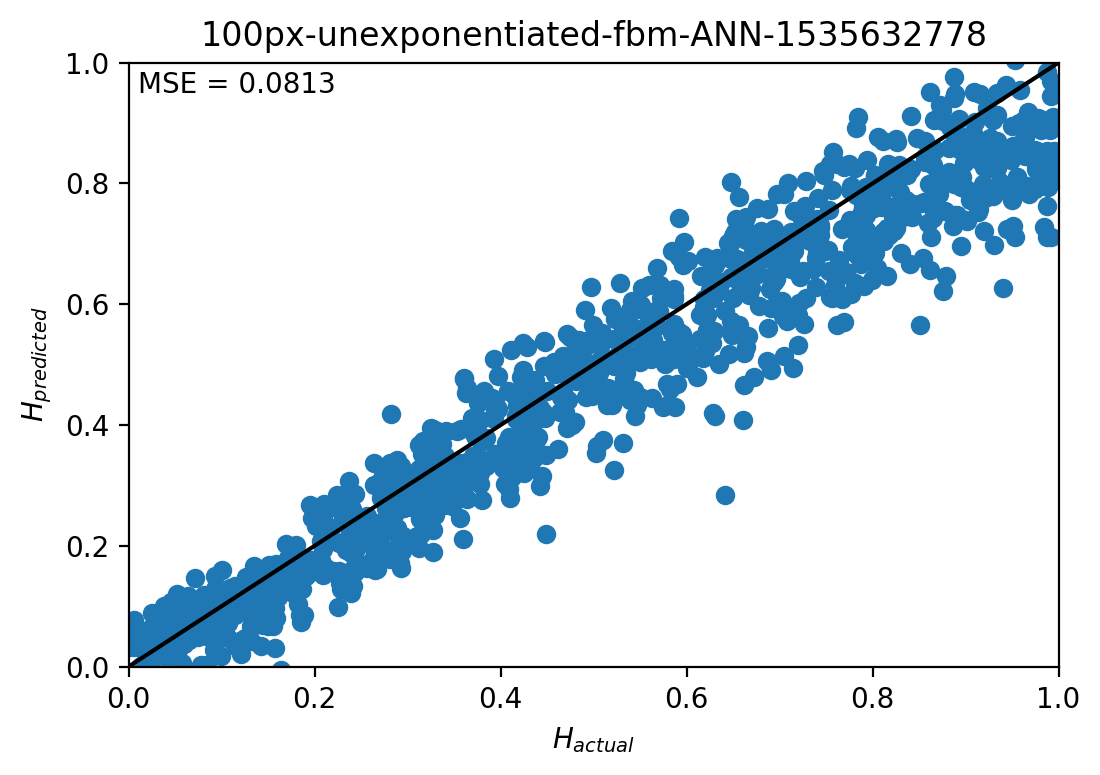

In [24]:
plt.figure(dpi = 200)
plt.scatter(y_test,predictions)
plt.text(0.01, 0.95, 'MSE = '+ '{:.3g}'.format(RMSE(y_test,predictions)))
plt.plot([0,1],[0,1],c='k')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.title('100px-unexponentiated-fbm-ANN-{}'.format(int(time.time())))
plt.savefig('../Data/fBmFields/2DUnexponentiated/100px/100px-unexponentiated-fbm-ANN-{}.png'.format(int(time.time())))
plt.show()